In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import time
import itertools
from scipy import stats
import psycopg2 as psql
from psycopg2.extras import RealDictCursor

import sys
sys.path.append("..")
from tools.flight_projection import *
from tools.conflict_handling import *

import seaborn as sns
sns.set(color_codes=True)

try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)

/home/victor/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [59]:
# path = '/mnt/59069d64-9ea5-4e20-9f29-fe60f14628ea/Thesis_data/DDR2 2018/allft+_columns.txt'
path = '/mnt/59069d64-9ea5-4e20-9f29-fe60f14628ea/Thesis_data/DDR2 2018/2018/ALL_FT+.20180501'
df = pd.read_csv(path, names=[str(i) for i in range(172)],
                              sep=';', usecols=[str(ii) for ii in 
                                                [0, 1, 2, 4, 5, 7,
                                                 57, 84, 85, 86, 87, 98, 99, 112, 113, 162, 163]])

df.columns = ['org', 'dst', 'icao', 'ac_type', 'start_t', 'end_t',
                           'callsign', 'flight_length', 'fl_points', 'flight_length_as', 'fl_points_as', 
             'flight_length_1', 'fl_points_1',
             'flight_length_2', 'fl_points_2',
             'flight_length_3', 'fl_points_3']

In [60]:
df

,org,dst,icao,ac_type,start_t,end_t,callsign,flight_length,fl_points,flight_length_as,fl_points_as,flight_length_1,fl_points_1,flight_length_2,fl_points_2,flight_length_3,fl_points_3
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LTAI,LTBJ,TCARD,CL60,2.018050e+13,2.018050e+13,TCARD,39.0,20180501112200:LTAI:EVBOL1B:2:0:A:365401N03047...,9.0,20180501112214:LTAIYNL:20180501112526:ES:36543...,NaN,NaN,39.0,20180501105700:LTAI:EVBOL1B:2:0:A:365401N03047...,NaN,NaN
2,EBBR,EKCH,BEL4CP,SU95,2.018050e+13,2.018050e+13,EIFWF,52.0,20180501174400:EBBR:NIK3C:2:0:A:505405N0042904...,23.0,20180501174432:EBBRTA:20180501174633:ES:505526...,NaN,NaN,108.0,20180501173700:EBBR:NIK3C:2:0:A:505405N0042904...,NaN,NaN
3,LTBA,OPLA,THY714E,A333,2.018043e+13,2.018043e+13,TCLOG,69.0,20180430174500:LTBA:MOPIN1B:2:0:A:405834N02848...,16.0,20180430174500:LTBASAN:20180430174815:ES:40583...,NaN,NaN,69.0,20180430174300:LTBA:MOPIN1B:2:0:A:405834N02848...,NaN,NaN
4,OPKC,LTBA,THY6550,A332,2.018043e+13,2.018043e+13,TCJDP,92.0,20180430190500:OPKC:DCT:0:0:A:245405N0670900E:...,10.0,20180430195500:OIIXALL:20180430223600:ES:27355...,NaN,NaN,92.0,20180430184800:OPKC:DCT:0:0:A:245405N0670900E:...,NaN,NaN
5,LEVC,LEPA,VLG395X,A320,2.018043e+13,2.018043e+13,ECMXG,34.0,20180430211000:LEVC:ORVUS1A:2:0:A:392922N00028...,8.0,20180430211000:LECLVVLC:20180430212157:ES:3929...,NaN,NaN,86.0,20180430210800:LEVC:ORVUS1G:2:0:A:392922N00028...,NaN,NaN
6,UKKK,EDDH,WZZ7317,A320,2.018050e+13,2.018050e+13,HALYX,69.0,20180501100000:UKKK:KR1K:6:0:A:502407N0302707E...,28.0,20180501100000:UKBVTC5:20180501100156:ES:50240...,69.0,20180501100000:UKKK:KR1K:6:0:A:502407N0302707E...,147.0,20180501100600:UKKK:KR1K:6:0:A:502407N0302707E...,NaN,NaN
7,EDDF,DTTA,TAR745,A320,2.018050e+13,2.018050e+13,TSIMF,74.0,20180501124400:EDDF:ANEKI9L:4:0:A:500200N00834...,31.0,20180501124400:EDGGADF:20180501124854:ES:50020...,NaN,NaN,125.0,20180501130900:EDDF:ANEKI9L:4:0:A:500200N00834...,NaN,NaN
8,LEBB,EHAM,KLM1686,E190,2.018050e+13,2.018050e+13,PHEXY,62.0,20180501100400:LEBB:BISKA3A:1:0:A:431804N00254...,21.0,20180501100400:LEBBTA:20180501101045:ES:431804...,62.0,20180501100400:LEBB:BISKA3A:1:0:A:431804N00254...,121.0,20180501095900:LEBB:BISKA3A:1:0:A:431804N00254...,NaN,NaN
9,EDDF,VTBS,DLH772,A343,2.018043e+13,2.018043e+13,DAIGT,97.0,20180430202100:EDDF:SULUS8L:4:0:A:500200N00834...,26.0,20180430202100:EDGGADF:20180430202817:ES:50020...,97.0,20180430202600:EDDF:SULUS8L:4:0:A:500200N00834...,133.0,20180430202200:EDDF:SULUS8L:4:0:A:500200N00834...,NaN,NaN


In [114]:
str(df['end_t'].iloc[1])

'20180501110000.0'

In [24]:
dffl = pd.DataFrame([i.split(':') for i in df['fl_points'].iloc[3].split(' ')])
# dffl.columns = ['start_ep_seg', 'seg_id', 'end_ep_seg', 'unknown', 'seg_crd_b', 'seg_crd_e', 'fl_start', 'fl_end'
#                't_elapsed_b', 't_elapsed_e']
dffl2 = pd.DataFrame([i.split(':') for i in df['fl_as_points'].iloc[3].split(' ')])


In [25]:
dffl.columns = ['ts', 'wp', 'loc_type', 'fl', 'time_el', 'msg_type', 'crd', 'unknown_var', 'unknown_status']
dffl

,ts,wp,loc_type,fl,time_el,msg_type,crd,unknown_var,unknown_status
0,20180430174500,LTBA,MOPIN1B,2,0,A,405834N0284851E,,Y
1,20180430174510,,DCT,5,1,V,405907N0284846E,9,Y
2,20180430174640,,DCT,35,7,V,410227N0284818E,64,Y
3,20180430174716,*1IST,MOPIN1B,50,11,D,410440N0284759E,,Y
4,20180430174800,,DCT,70,16,V,410511N0285132E,17,Y
5,20180430174846,,DCT,90,22,V,410547N0285547E,38,Y
6,20180430174932,,DCT,110,29,V,410630N0290046E,62,Y
7,20180430175022,,DCT,130,37,V,410719N0290626E,90,Y
8,20180430175037,BKZ,MOPIN1B,136,40,N,410737N0290834E,,Y
9,20180430175113,,DCT,150,46,V,410937N0291155E,10,Y


In [71]:
import datetime

def create_epoch_ts(ts):
    try:

        ep = (datetime.datetime.strptime(str(int(ts)), '%Y%m%d%H%M%S') -
              datetime.datetime(1970, 1, 1)).total_seconds()

        return ep

    except Exception as e:
        print(e)
        return np.nan


def get_latlon(crd):

    c = crd
    lat = int(c[:2]) + (int(c[2:4]) * 60 + int(c[4:6])) / 3600
    lon = int(c[7:10]) + (int(c[10:12])*60 + int(c[12:14]))/3600

    if c[14] == 'W':
        lon = -lon

    if c[6] == 'S':
        lat = -lat

    return lat, lon


def process_ftfm_row(r):

    r_dict = {}

    try:
        r_dict['flight_length'] = r['flight_length_as']
        r_dict['data_type'] = 'm3'
        r_dict['org'] = r['org']
        r_dict['dst'] = r['dst']
        r_dict['ac_type'] = r['ac_type']
        r_dict['callsign'] = r['icao']

        r_dict['seg_id'] = []
        r_dict['ep_seg_b'] = []
        r_dict['ep_seg_e'] = []
        r_dict['fl_seg_b'] = []
        r_dict['fl_seg_e'] = []
        r_dict['status'] = []
        r_dict['lat_seg_b'] = []
        r_dict['lon_seg_b'] = []
        r_dict['lat_seg_e'] = []
        r_dict['lon_seg_e'] = []
        r_dict['seq'] = []
        r_dict['seg_len'] = []
        r_dict['seg_par'] = []

        fl_df = pd.DataFrame([i.split(':') for i in r['fl_points_as'].split(' ')])
        fl_df.columns = ['t_seg_b', 'seg_id', 't_seg_e', 'unknown',
                         'seg_crd_b', 'seg_crd_e', 'fl_seg_b', 'fl_seg_e',
                         't_elapsed_b', 't_elapsed_e']

        for i, d in fl_df.iterrows():
            r_dict['seg_id'].append(d['seg_id'])
            r_dict['ep_seg_b'].append(create_epoch_ts(d['t_seg_b']))
            r_dict['ep_seg_e'].append(create_epoch_ts(d['t_seg_e']))
            r_dict['fl_seg_b'].append(d['fl_seg_b'])
            r_dict['fl_seg_e'].append(d['fl_seg_b'])
            r_dict['status'].append(0)

            lat_b, lon_b = get_latlon(d['seg_crd_b'])
            lat_e, lon_e = get_latlon(d['seg_crd_e'])

            r_dict['lat_seg_b'].append(lat_b)
            r_dict['lon_seg_b'].append(lon_b)
            r_dict['lat_seg_e'].append(lat_e)
            r_dict['lon_seg_e'].append(lon_e)
            r_dict['seq'].append(i)
            r_dict['seg_len'].append(0)
            r_dict['seg_par'].append(0)

        r_dict['start_ep'] = r_dict['ep_seg_b'][0]
        r_dict['end_ep'] = r_dict['ep_seg_e'][-1]
        r_dict['start_lat'] = r_dict['lat_seg_b'][0]
        r_dict['start_lon'] = r_dict['lon_seg_b'][0]
        r_dict['end_lat'] = r_dict['lat_seg_e'][-1]
        r_dict['end_lon'] = r_dict['lon_seg_e'][-1]
        r_dict['flight_id'] = '%s_%s' % (str(r['icao']), str(r_dict['start_ep']))
        
        return r_dict

    except Exception as e:
        print(e)
        return False

    return True


def process_ctfm_row(r):
    r_dict = {}

    try:
        r_dict['flight_length'] = r['flight_length']
        r_dict['org'] = r['org']
        r_dict['dst'] = r['dst']
        r_dict['ac_type'] = r['ac_type']
        r_dict['callsign'] = r['icao']

        r_dict['seg_id'] = []
        r_dict['ep_seg_b'] = []
        r_dict['ep_seg_e'] = []
        r_dict['fl_seg_b'] = []
        r_dict['fl_seg_e'] = []
        r_dict['status'] = []
        r_dict['lat_seg_b'] = []
        r_dict['lon_seg_b'] = []
        r_dict['lat_seg_e'] = []
        r_dict['lon_seg_e'] = []
        r_dict['seq'] = []
        r_dict['seg_len'] = []
        r_dict['seg_par'] = []

        fl_df = pd.DataFrame(
            [i.split(':') for i in r['fl_points_2'].split(' ')])
        fl_df.columns = ['ts', 'wp', 'loc_type', 'fl', 'time_el',
                         'msg_type', 'crd', 'unknown_var', 'unknown_status']

        for i, d in fl_df.iterrows():

            r_dict['seg_id'].append(d['wp'])
            r_dict['ep_seg_b'].append(create_epoch_ts(d['ts']))
            r_dict['fl_seg_b'].append(d['fl'])
            r_dict['status'].append(0)

            lat, lon = get_latlon(d['crd'])

            r_dict['lat_seg_b'].append(lat)
            r_dict['lon_seg_b'].append(lon)

            r_dict['seq'].append(i)
            r_dict['seg_len'].append(0)
            r_dict['seg_par'].append(0)

        r_dict['ep_seg_e'] = r_dict['ep_seg_b'][1:]
        r_dict['fl_seg_e'] = r_dict['fl_seg_b'][1:]
        r_dict['lon_seg_e'] = r_dict['lon_seg_b'][1:]
        r_dict['lat_seg_e'] = r_dict['lat_seg_b'][1:]

        for k in ['seg_id', 'ep_seg_b', 'fl_seg_b', 'status', 'lat_seg_b', 
                  'lon_seg_b', 'seq', 'seg_len', 'seg_par']:
            r_dict[k] = r_dict[k][:-1]

        r_dict['start_ep'] = r_dict['ep_seg_b'][0]
        r_dict['end_ep'] = r_dict['ep_seg_e'][-1]
        r_dict['start_lat'] = r_dict['lat_seg_b'][0]
        r_dict['start_lon'] = r_dict['lon_seg_b'][0]
        r_dict['end_lat'] = r_dict['lat_seg_e'][-1]
        r_dict['end_lon'] = r_dict['lon_seg_e'][-1]
        r_dict['flight_id'] = '%s_%s' % (
        str(r['icao']), str(r_dict['start_ep']))
        
        return r_dict

    except Exception as e:
        print(e)
        return False

In [63]:
l = [1,2,3,4,5]
l[:-1]

[1, 2, 3, 4]

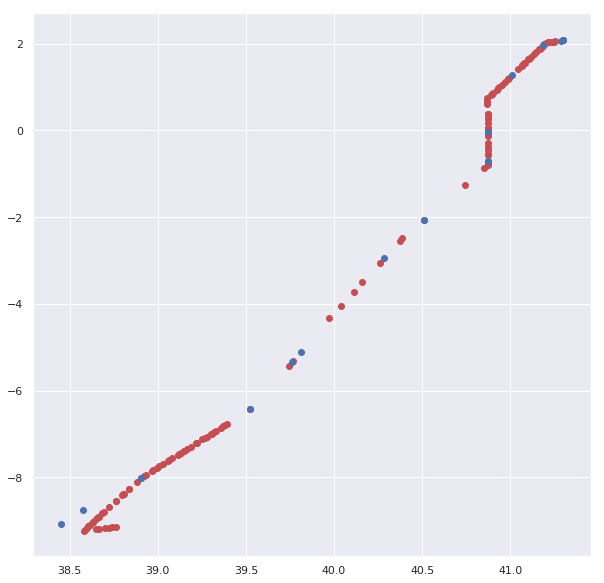

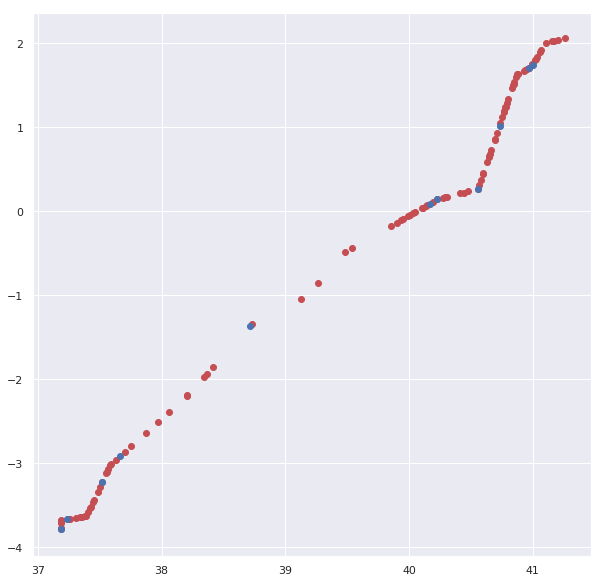

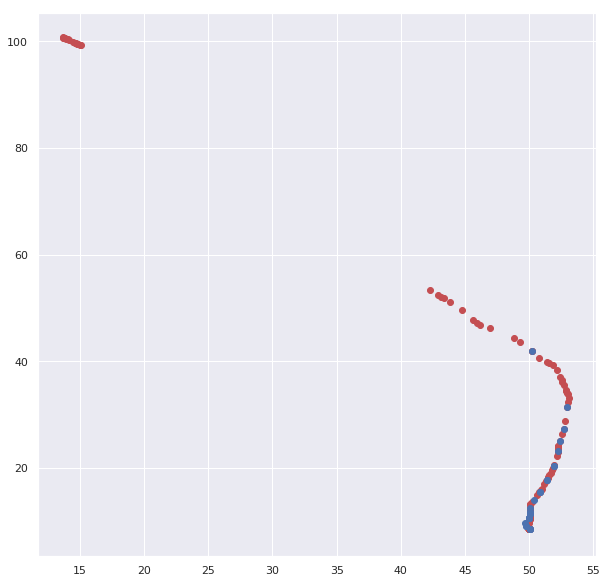

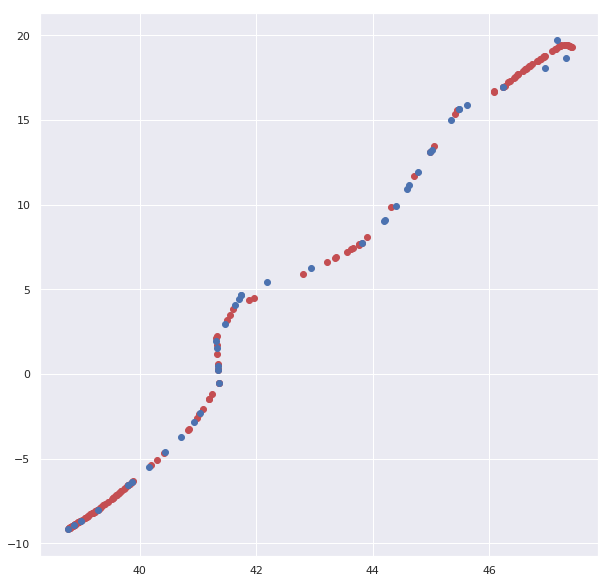

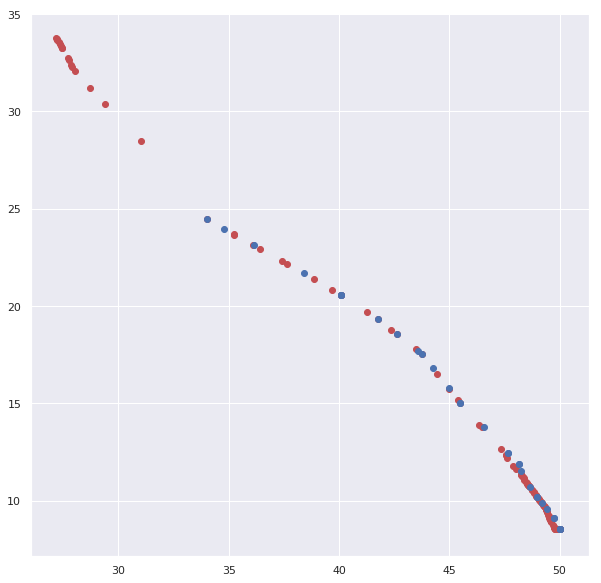

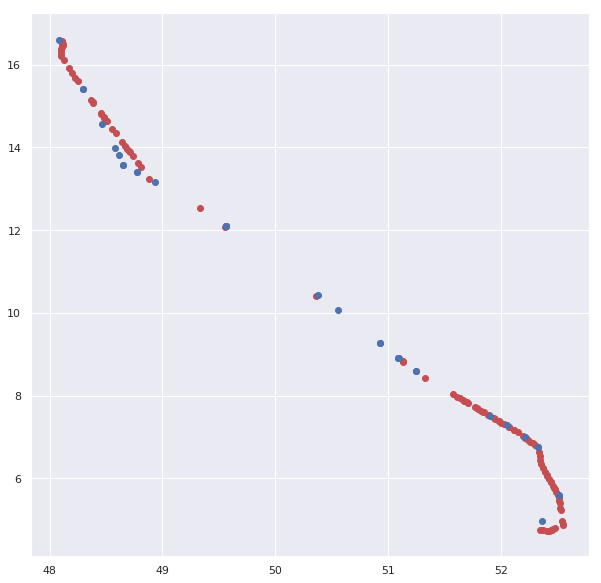

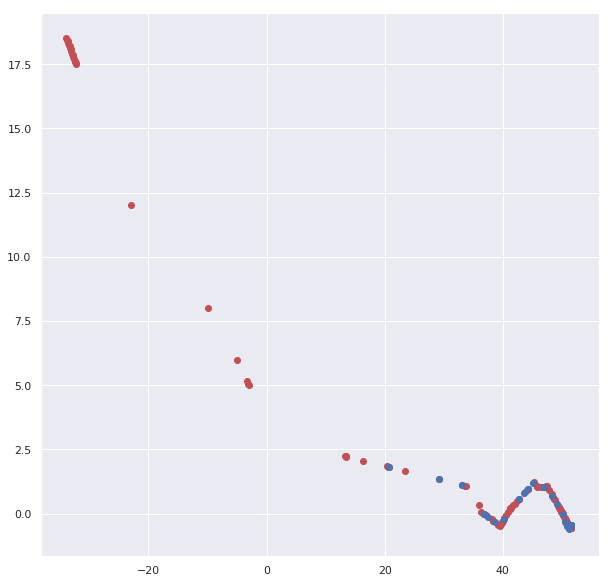

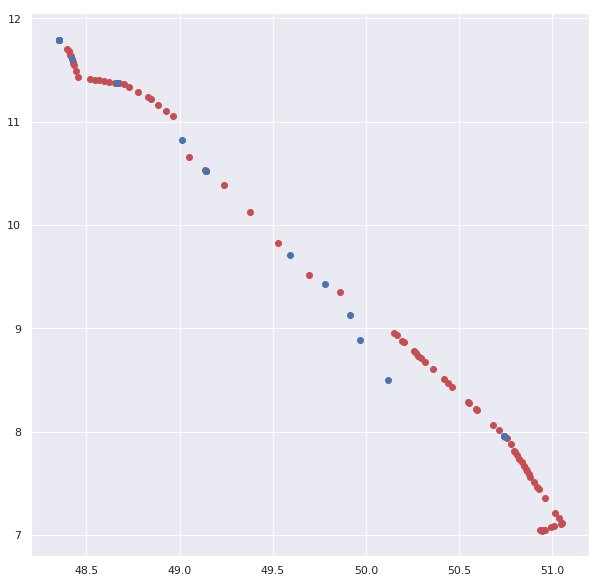

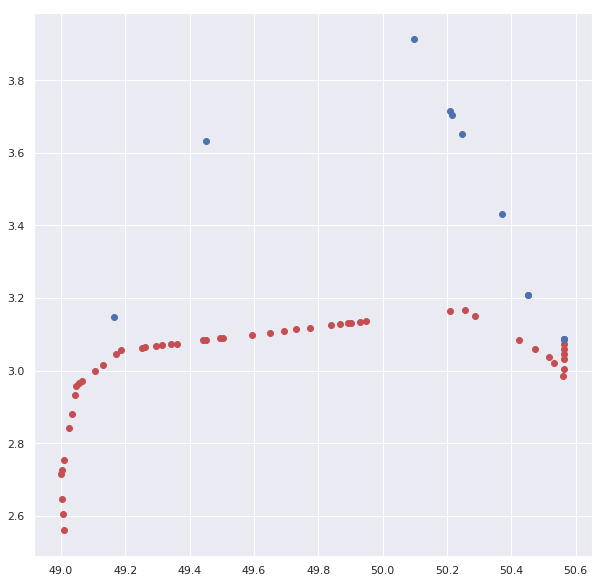

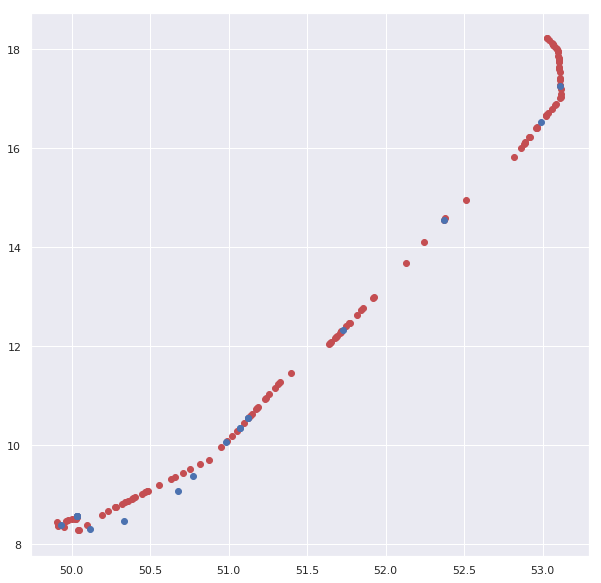

In [78]:
for i in range(50,60):
    point_dct = process_ctfm_row(df.iloc[i])
    as_dct = process_ftfm_row(df.iloc[i])
    plt.figure(figsize=(10,10))
    plt.scatter(point_dct['lat_seg_b'], point_dct['lon_seg_b'], c='r')
    plt.scatter(as_dct['lat_seg_b'], as_dct['lon_seg_b'])
    plt.show()

In [96]:
int(c[7:10])+ (int(c[10:12])*60 + int(c[12:14]))/3600

6.27

In [99]:
c[14]

'W'

In [105]:
l = [r for i,r in df.iterrows()]

In [107]:
l[1]

org                                                       LTAI
dst                                                       LTBJ
icao                                                     TCARD
start_t                                            2.01805e+13
end_t                                              2.01805e+13
fl_points    20180501112214:LTAIYNL:20180501112526:ES:36543...
Name: 1, dtype: object

In [6]:
try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)
cur_read = conn.cursor(cursor_factory=RealDictCursor)
cur_read.execute("SELECT * FROM public.adsb_ctfm_flights_2 limit 20;")
batch = cur_read.fetchall()
conn.close()

0083C3_1526347197


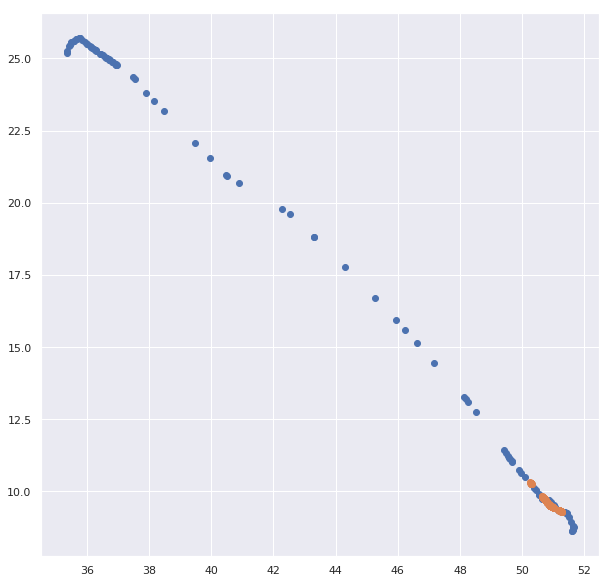

009AD8_1538722168


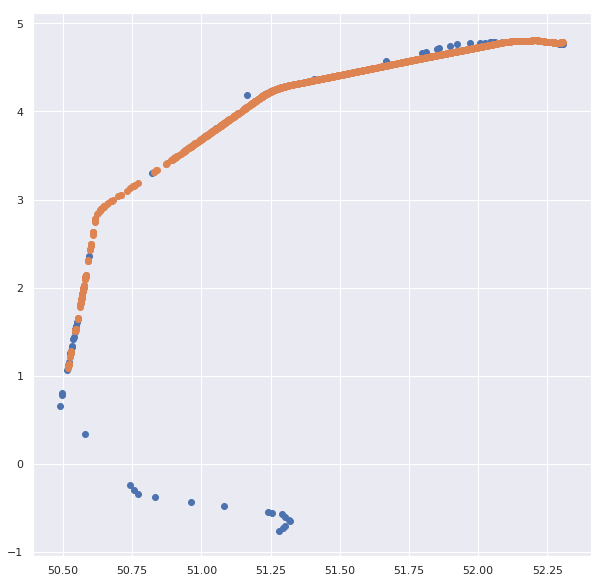

00A155_1525804178


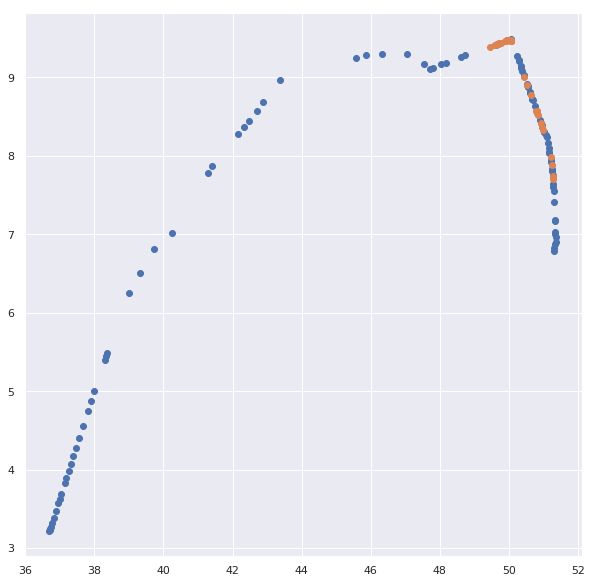

00A2E4_1525690730


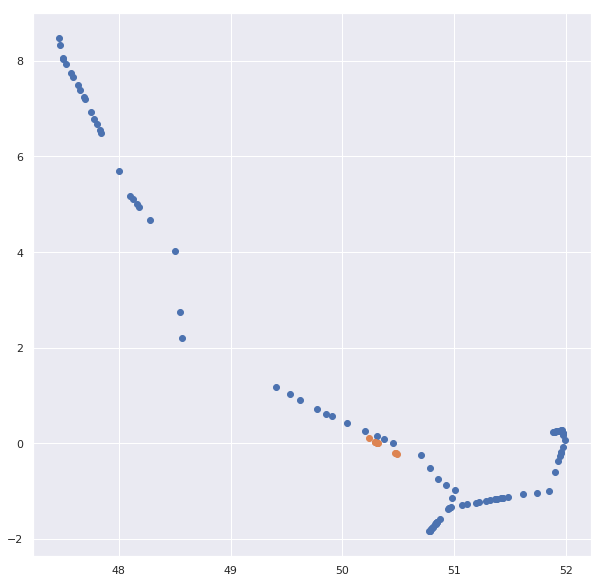

00A2E4_1538594606


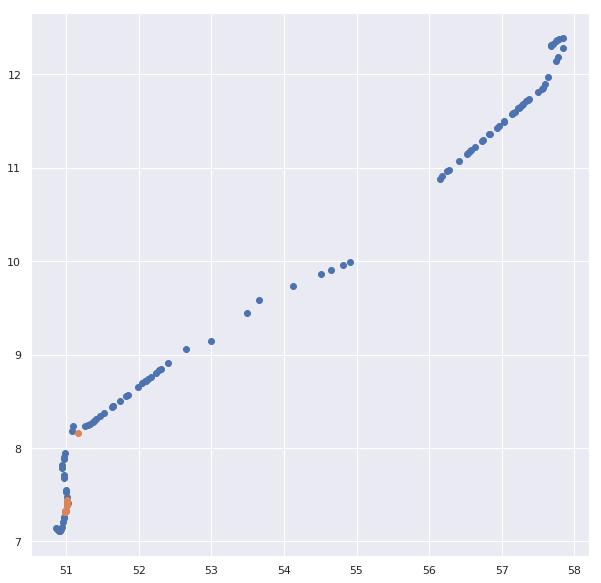

00A2E4_1539182096


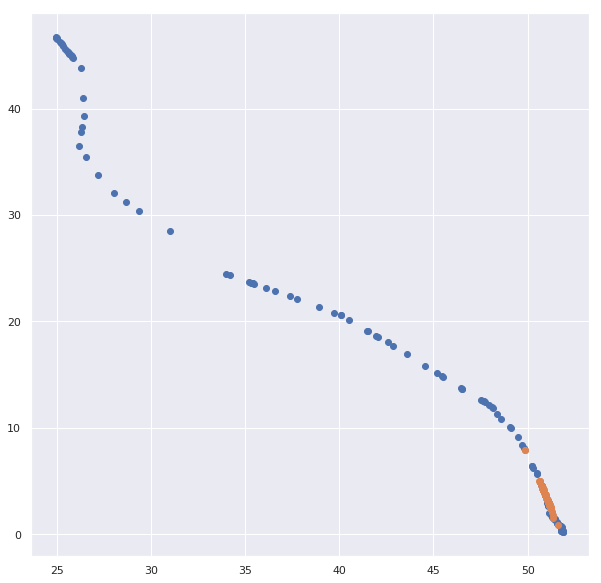

00B0F2_1526357707


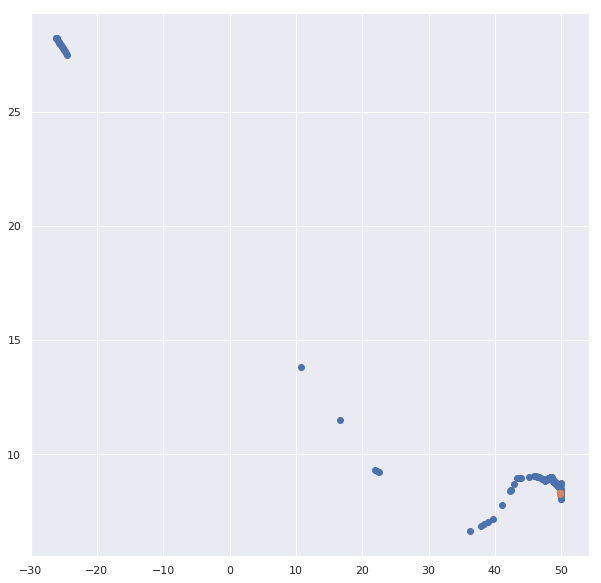

00B0F3_1526008664


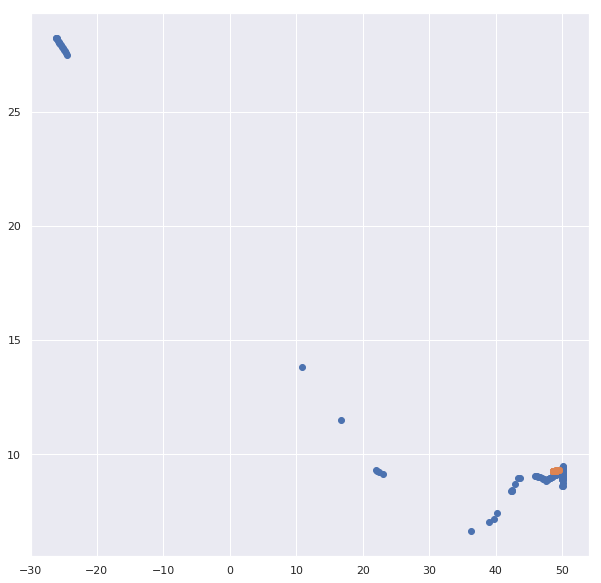

00B290_1525501796


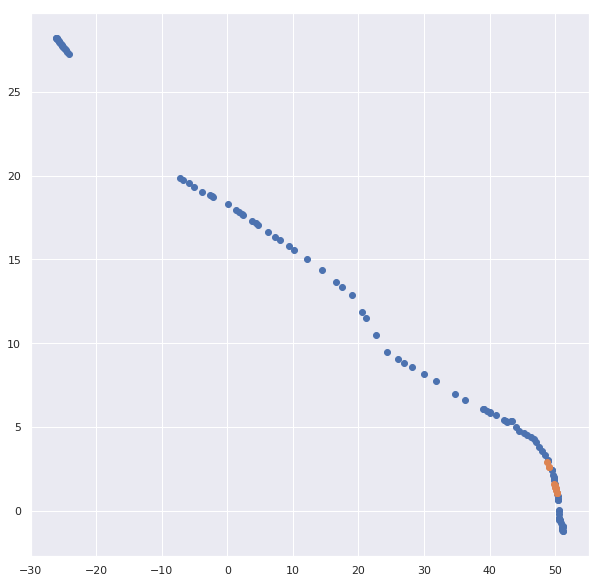

00B290_1525623587


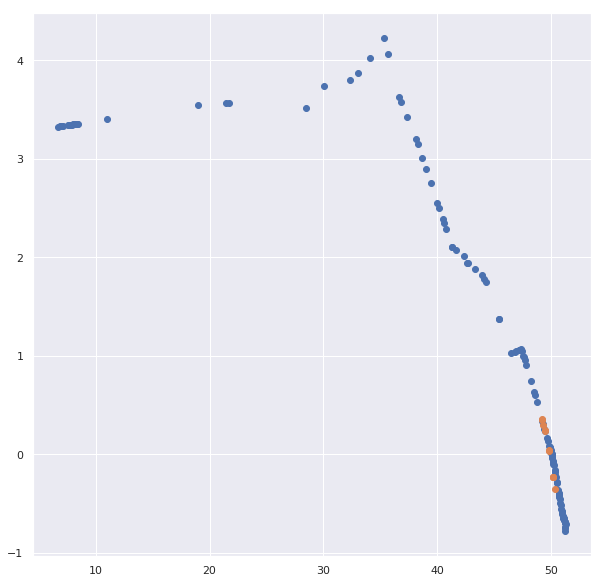

010009_1525985394


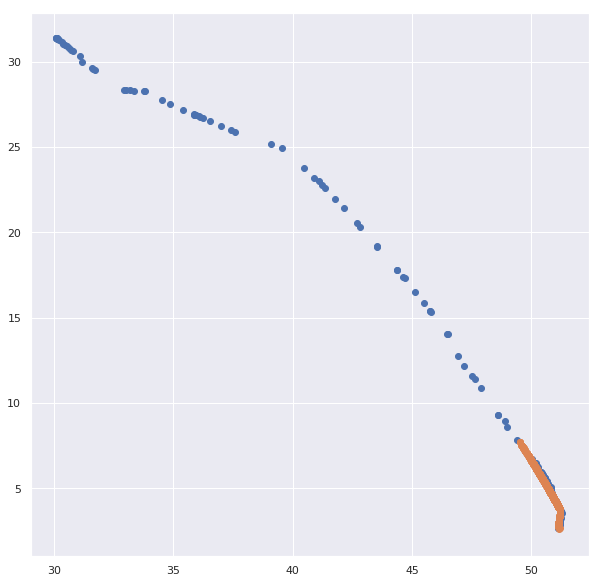

010009_1526246310


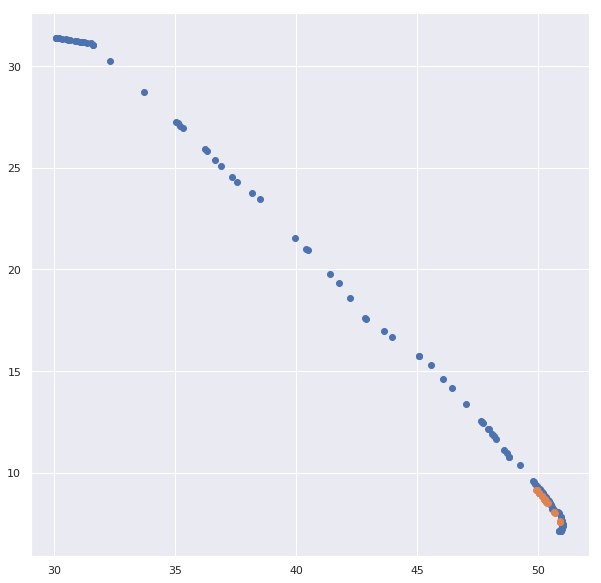

010009_1539077888


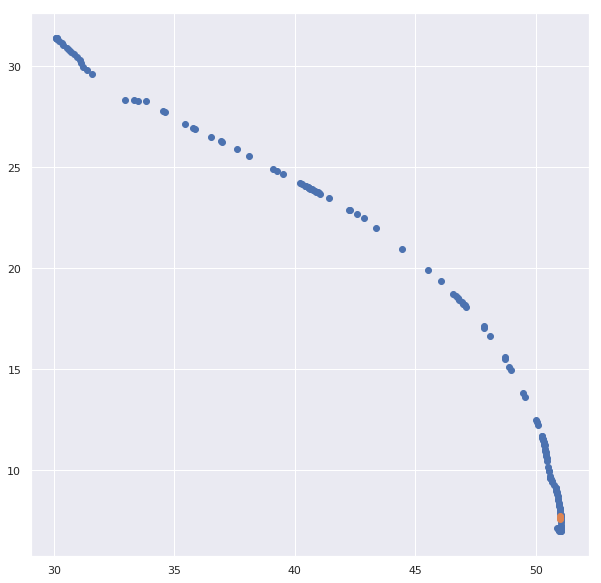

01000F_1525633135


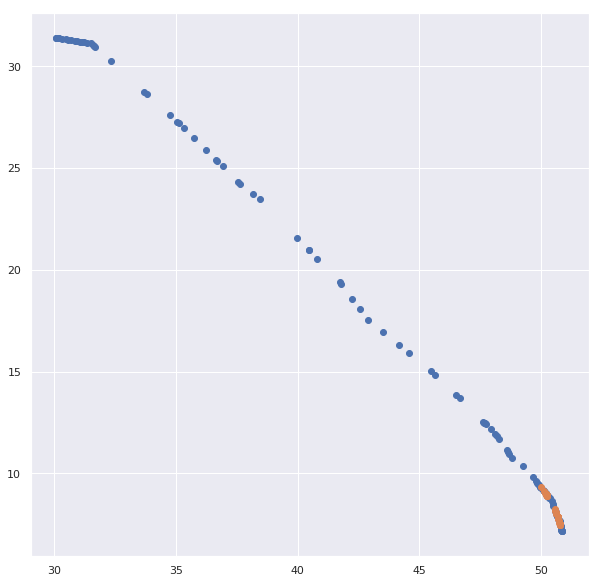

01000F_1538583890


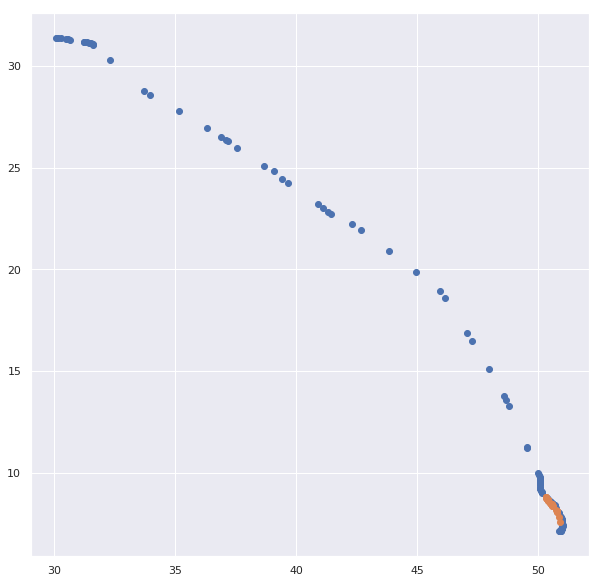

0100E5_1525549932


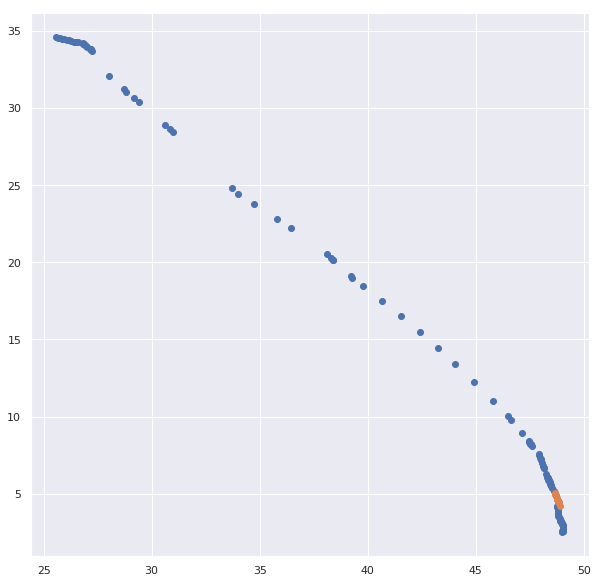

010109_1539205365


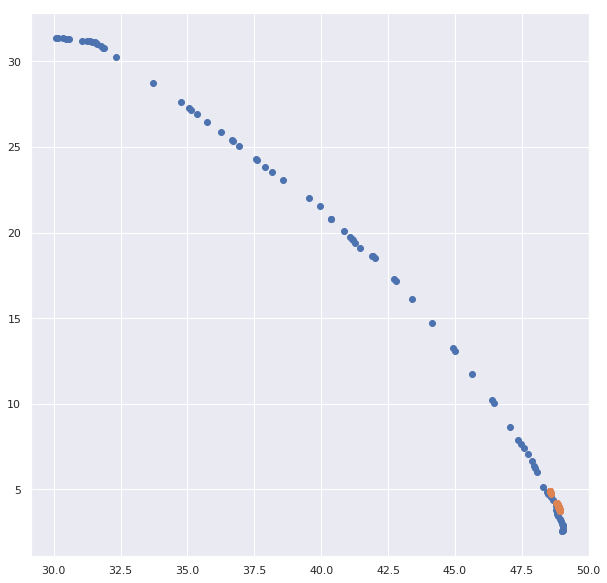

01010C_1539119045


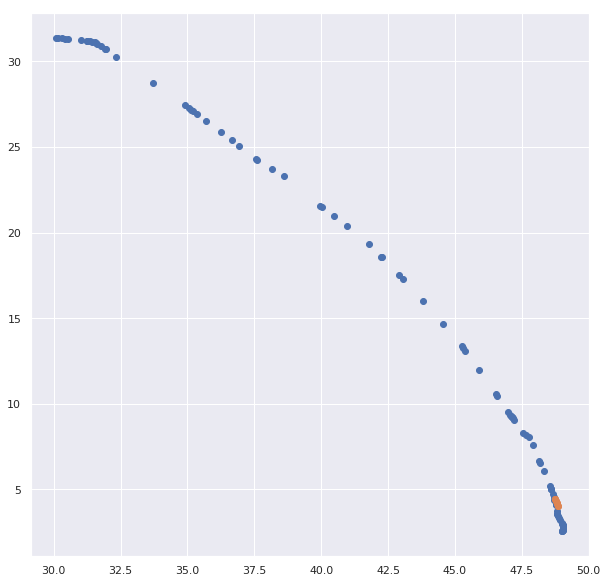

01012A_1525321876


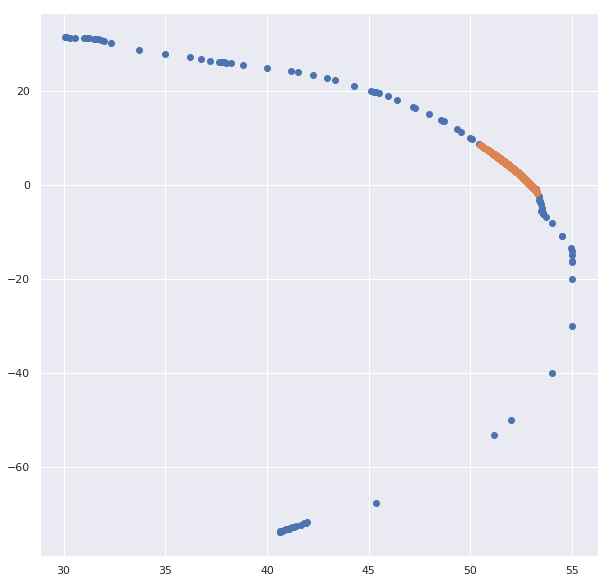

01012A_1525865796


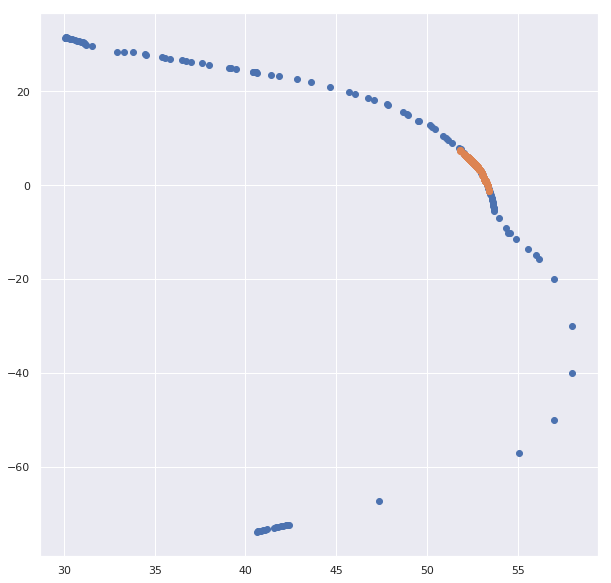

In [7]:
for b in batch:
    
    plt.figure(figsize=(10,10))
    plt.scatter(b['lat_seg_b'], b['lon_seg_b'])
    plt.scatter(b['lat'], b['lon'])
    print(b['flight_id'])
    plt.show()

In [81]:
point_dct['ep_seg_b']

[1525169160.0,
 1525169209.0,
 1525169244.0,
 1525169261.0,
 1525169277.0,
 1525169293.0,
 1525169321.0,
 1525169335.0,
 1525169376.0,
 1525169403.0,
 1525169416.0,
 1525169441.0,
 1525169498.0,
 1525169503.0,
 1525169550.0,
 1525169638.0,
 1525169668.0,
 1525169699.0,
 1525169704.0,
 1525169729.0,
 1525169746.0,
 1525169757.0,
 1525169776.0,
 1525169780.0,
 1525169790.0,
 1525169822.0,
 1525169836.0,
 1525169845.0,
 1525169850.0,
 1525169900.0,
 1525169952.0,
 1525169971.0,
 1525170007.0,
 1525170038.0,
 1525170082.0,
 1525170118.0,
 1525170201.0,
 1525170237.0,
 1525170272.0,
 1525170305.0,
 1525170358.0,
 1525170388.0,
 1525170400.0,
 1525170411.0,
 1525170438.0,
 1525170450.0,
 1525170454.0,
 1525170497.0,
 1525170505.0,
 1525170526.0,
 1525170564.0,
 1525170587.0,
 1525170595.0,
 1525170654.0,
 1525170847.0,
 1525170851.0,
 1525170860.0,
 1525170882.0,
 1525170890.0,
 1525170894.0,
 1525170911.0,
 1525170914.0,
 1525170919.0,
 1525170949.0,
 1525170968.0,
 1525170972.0,
 152517101

In [80]:
point_dct['ep_seg_e']

[1525169209.0,
 1525169244.0,
 1525169261.0,
 1525169277.0,
 1525169293.0,
 1525169321.0,
 1525169335.0,
 1525169376.0,
 1525169403.0,
 1525169416.0,
 1525169441.0,
 1525169498.0,
 1525169503.0,
 1525169550.0,
 1525169638.0,
 1525169668.0,
 1525169699.0,
 1525169704.0,
 1525169729.0,
 1525169746.0,
 1525169757.0,
 1525169776.0,
 1525169780.0,
 1525169790.0,
 1525169822.0,
 1525169836.0,
 1525169845.0,
 1525169850.0,
 1525169900.0,
 1525169952.0,
 1525169971.0,
 1525170007.0,
 1525170038.0,
 1525170082.0,
 1525170118.0,
 1525170201.0,
 1525170237.0,
 1525170272.0,
 1525170305.0,
 1525170358.0,
 1525170388.0,
 1525170400.0,
 1525170411.0,
 1525170438.0,
 1525170450.0,
 1525170454.0,
 1525170497.0,
 1525170505.0,
 1525170526.0,
 1525170564.0,
 1525170587.0,
 1525170595.0,
 1525170654.0,
 1525170847.0,
 1525170851.0,
 1525170860.0,
 1525170882.0,
 1525170890.0,
 1525170894.0,
 1525170911.0,
 1525170914.0,
 1525170919.0,
 1525170949.0,
 1525170968.0,
 1525170972.0,
 1525171014.0,
 152517104

In [8]:
min(30,50)

30

In [10]:
[i if i < 6 else np.nan for i in [1,2,3,4,5,6,7,8]]

[1, 2, 3, 4, 5, nan, nan, nan]

In [14]:
np.linspace(0,1200,61)

array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
        180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
        360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
        540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
        720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
        900.,  920.,  940.,  960.,  980., 1000., 1020., 1040., 1060.,
       1080., 1100., 1120., 1140., 1160., 1180., 1200.])

In [15]:
sorted([3,5,6,8,1,2])

[1, 2, 3, 5, 6, 8]

In [16]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]